In [1]:
# Import necessary libraries
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import fetch_california_housing


LOAD THE DATASET

In [2]:
# Load the California housing dataset
california = fetch_california_housing()

UNDERSTANDING THE DATASET

In [3]:
# Display the keys of the dataset (overview of available data)
print("Keys of the California Housing dataset:", california.keys())


Keys of the California Housing dataset: dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])


In [4]:
# Description of the dataset
print("\nDescription of the dataset:")
print(california.DESCR)



Description of the dataset:
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S.

In [5]:
# Data (features)
print("\nFeature data:")
print(california.data)



Feature data:
[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]


In [6]:
# Target (housing prices)
print("\nTarget (housing prices):")
print(california.target)


Target (housing prices):
[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [7]:
# Feature names
print("\nFeature names:")
print(california.feature_names)


Feature names:
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [8]:
# Convert the data into a Pandas DataFrame for easier analysis
california_df = pd.DataFrame(california.data, columns=california.feature_names)

# Add the target as a new column (housing prices)
california_df['Price'] = california.target

In [9]:
# Display the first few rows of the dataset to get an overview
print("\nFirst 5 rows of the California Housing dataset:")
print(california_df.head())


First 5 rows of the California Housing dataset:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Price  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  


In [10]:
# Basic statistical summary of the features
print("\nBasic statistical summary of the features:")
print(california_df.describe())


Basic statistical summary of the features:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude         Price  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532     

EXPLORATORY DATA ANALYSIS

In [11]:
# Checking for missing values
print("\nMissing values in the dataset:")
print(california_df.isnull().sum())


Missing values in the dataset:
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64


<Figure size 1500x1000 with 0 Axes>

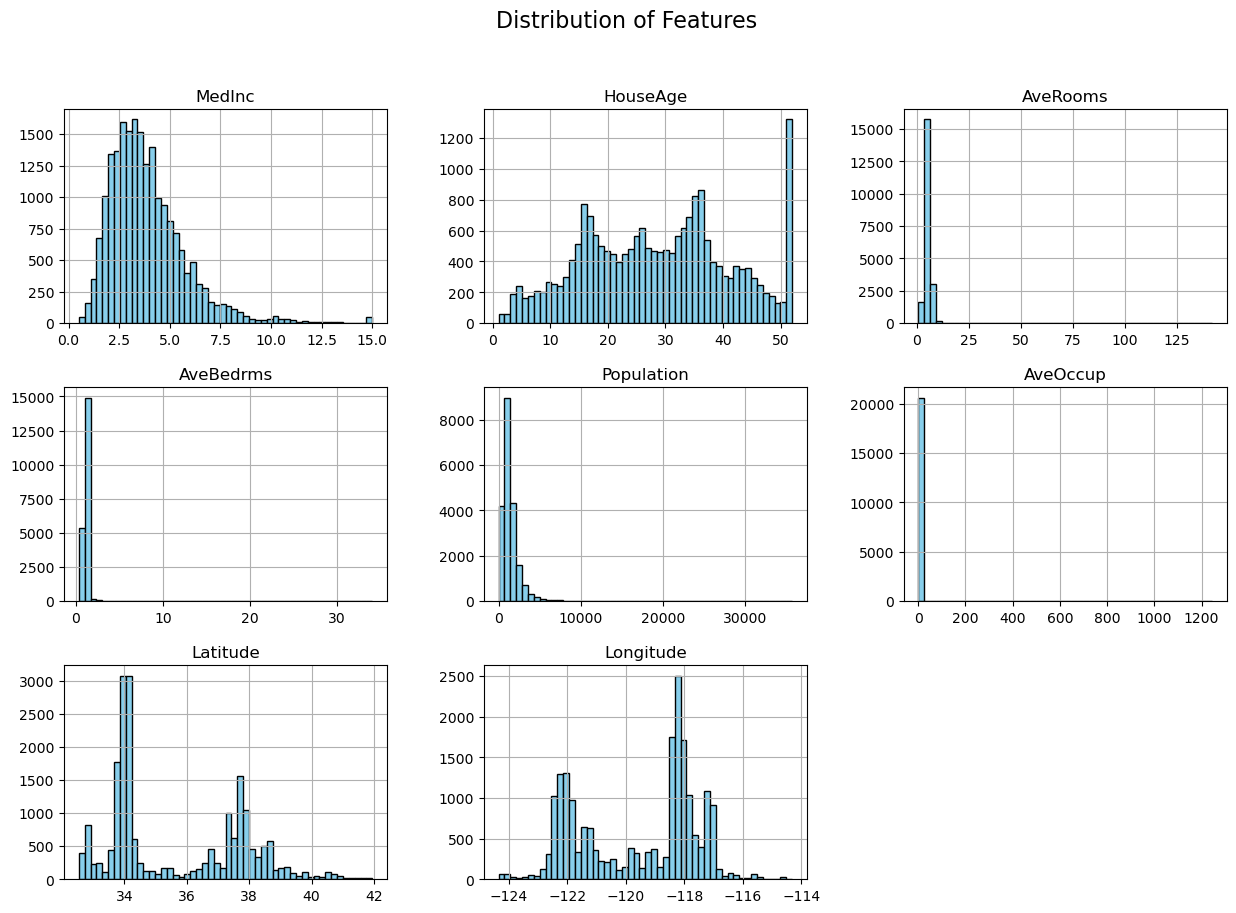

In [12]:
# Data Distribution for features and target
plt.figure(figsize=(15, 10))
california_df.drop('Price', axis=1).hist(bins=50, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Features", fontsize=16)
plt.show()

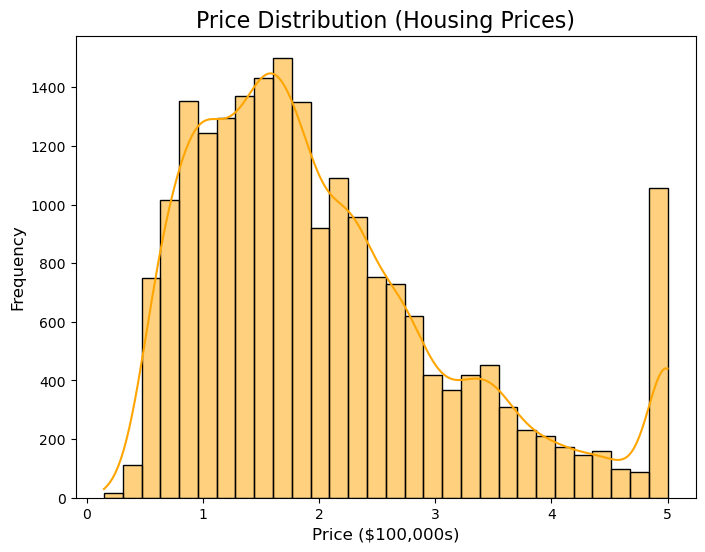

In [13]:
# Distribution of target (Price)
plt.figure(figsize=(8, 6))
sns.histplot(california_df['Price'], kde=True, color='orange', bins=30)
plt.title('Price Distribution (Housing Prices)', fontsize=16)
plt.xlabel('Price ($100,000s)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

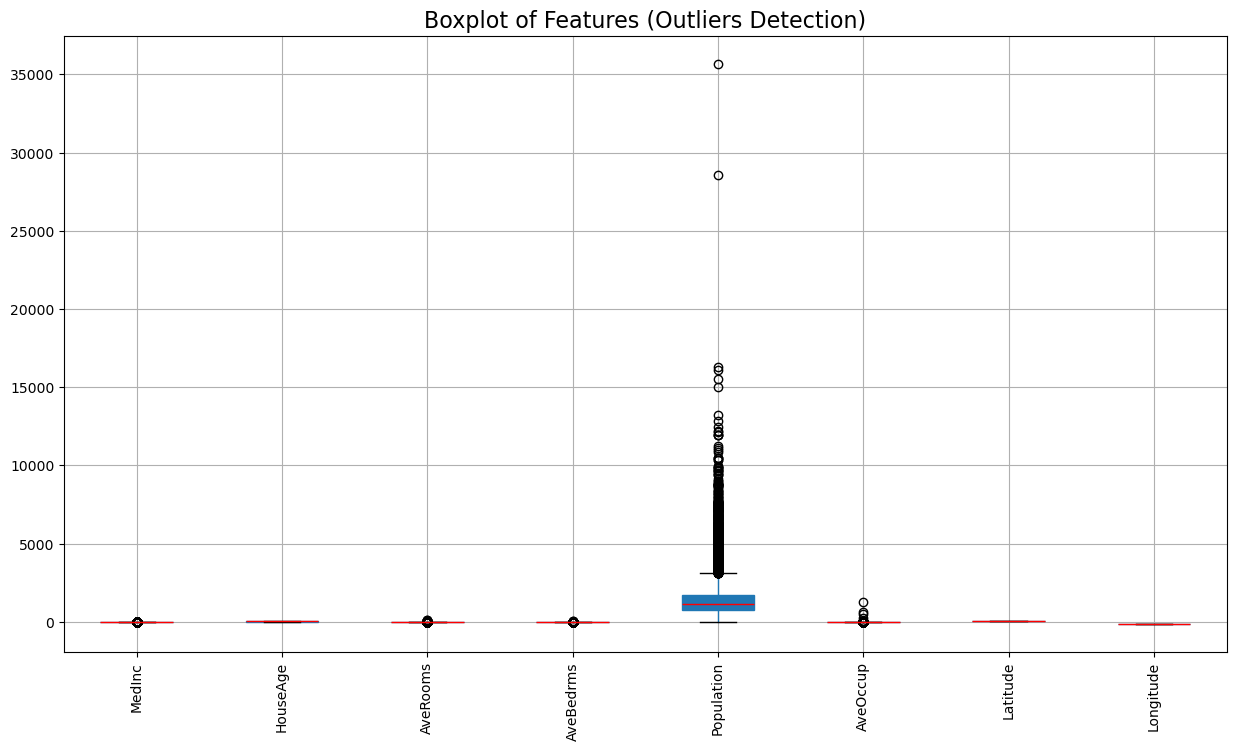

In [14]:
# Boxplot to detect outliers
plt.figure(figsize=(15, 8))
california_df.drop('Price', axis=1).boxplot(rot=90, patch_artist=True, medianprops={'color': 'red'})
plt.title('Boxplot of Features (Outliers Detection)', fontsize=16)
plt.show()

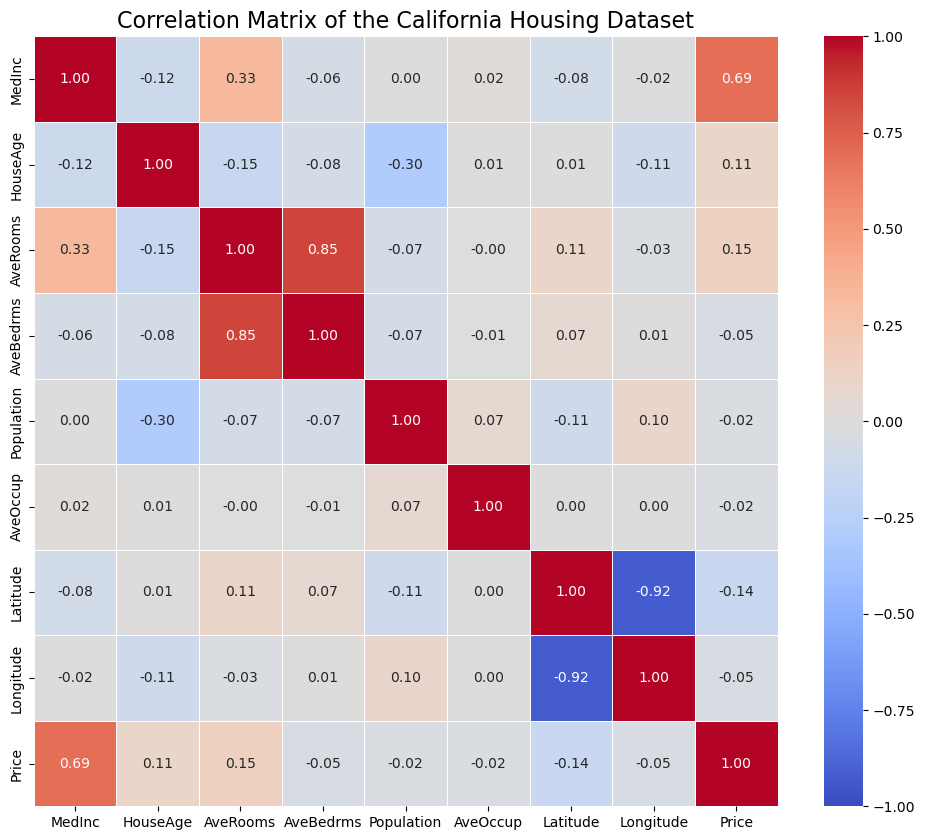

In [15]:
# Correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = california_df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title("Correlation Matrix of the California Housing Dataset", fontsize=16)
plt.show()

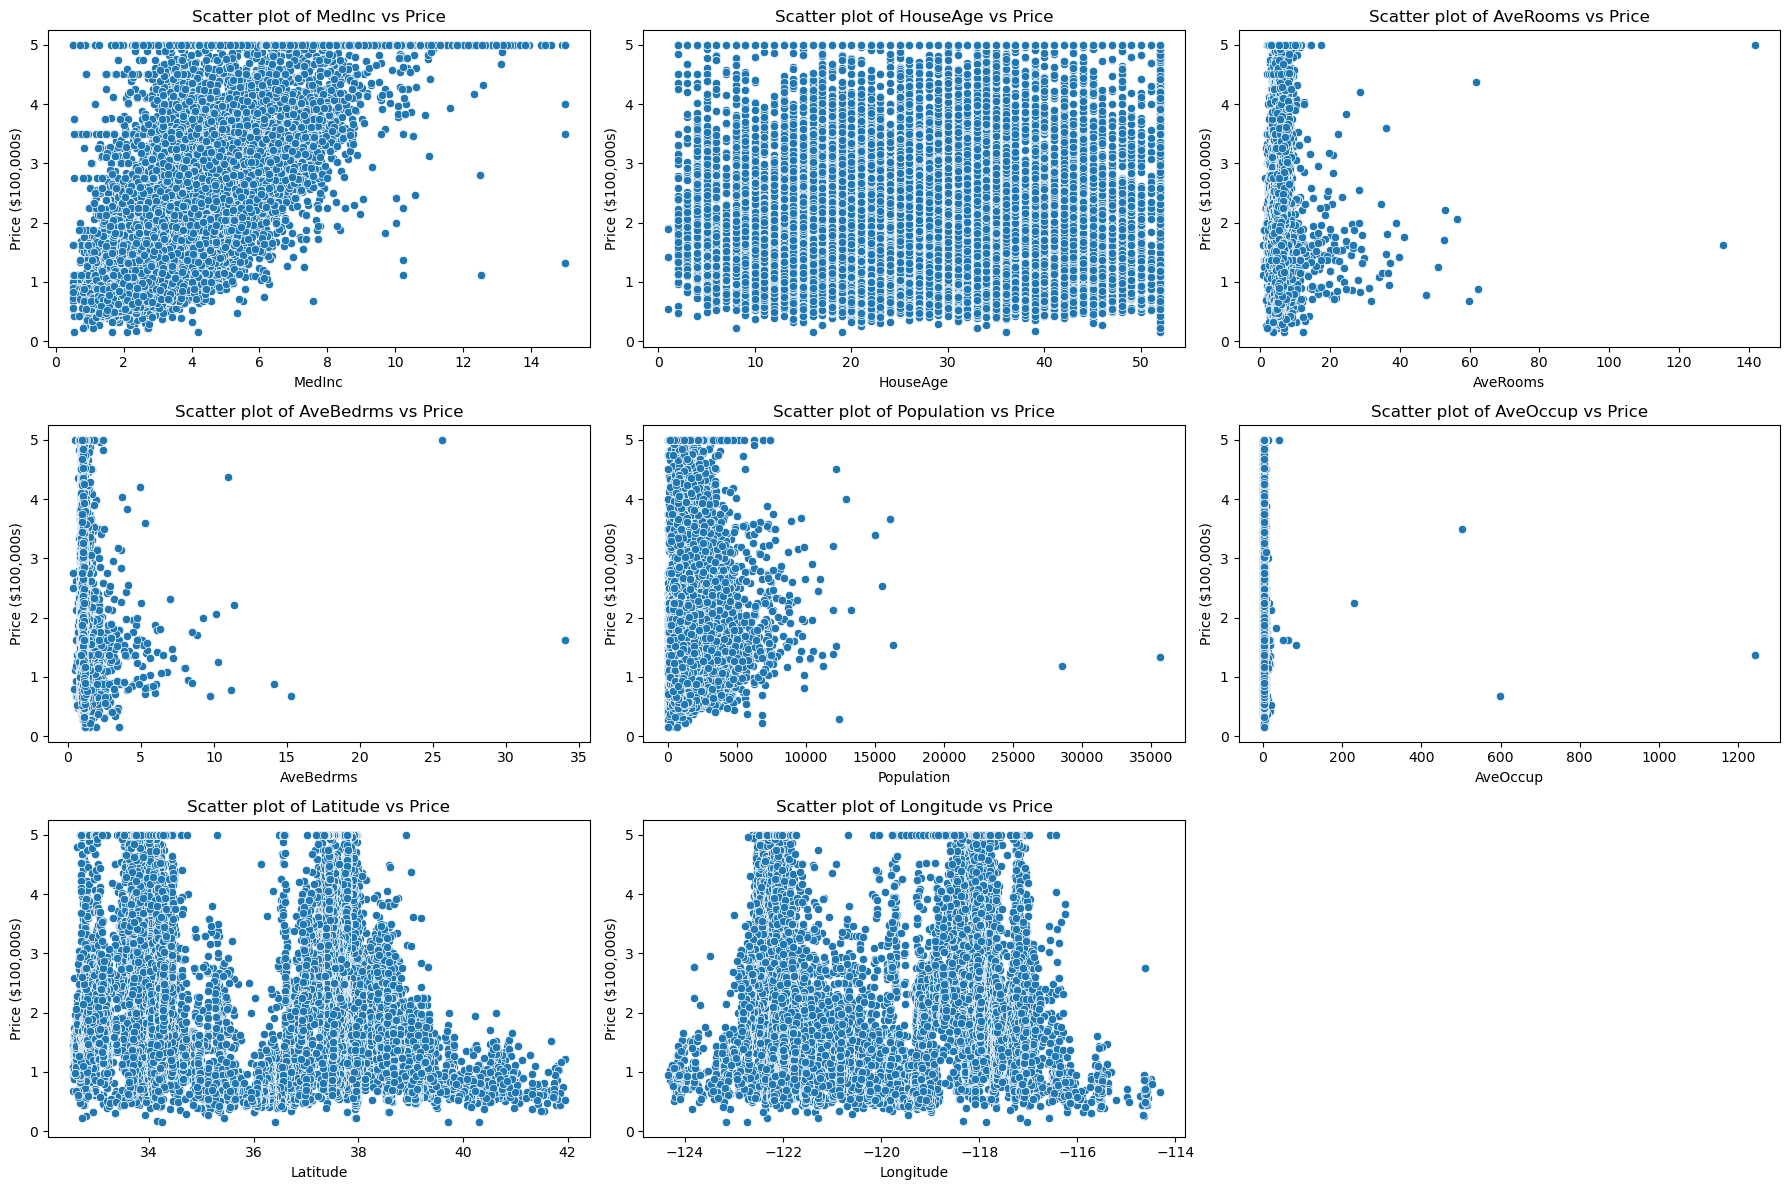

In [16]:
# Scatter plots to check relationships between 'Price' and other features
features = california_df.drop(columns=['Price'])
plt.figure(figsize=(18, 12))

# Adjust the number of rows and columns to fit all the features (8 features)
rows, cols = 3, 3  # 3 rows and 3 columns will be sufficient

for i, feature in enumerate(features.columns, 1):
    plt.subplot(rows, cols, i)
    sns.scatterplot(x=california_df[feature], y=california_df['Price'])
    plt.title(f'Scatter plot of {feature} vs Price', fontsize=12)
    plt.xlabel(feature, fontsize=10)
    plt.ylabel('Price ($100,000s)', fontsize=10)

plt.tight_layout()
plt.show()


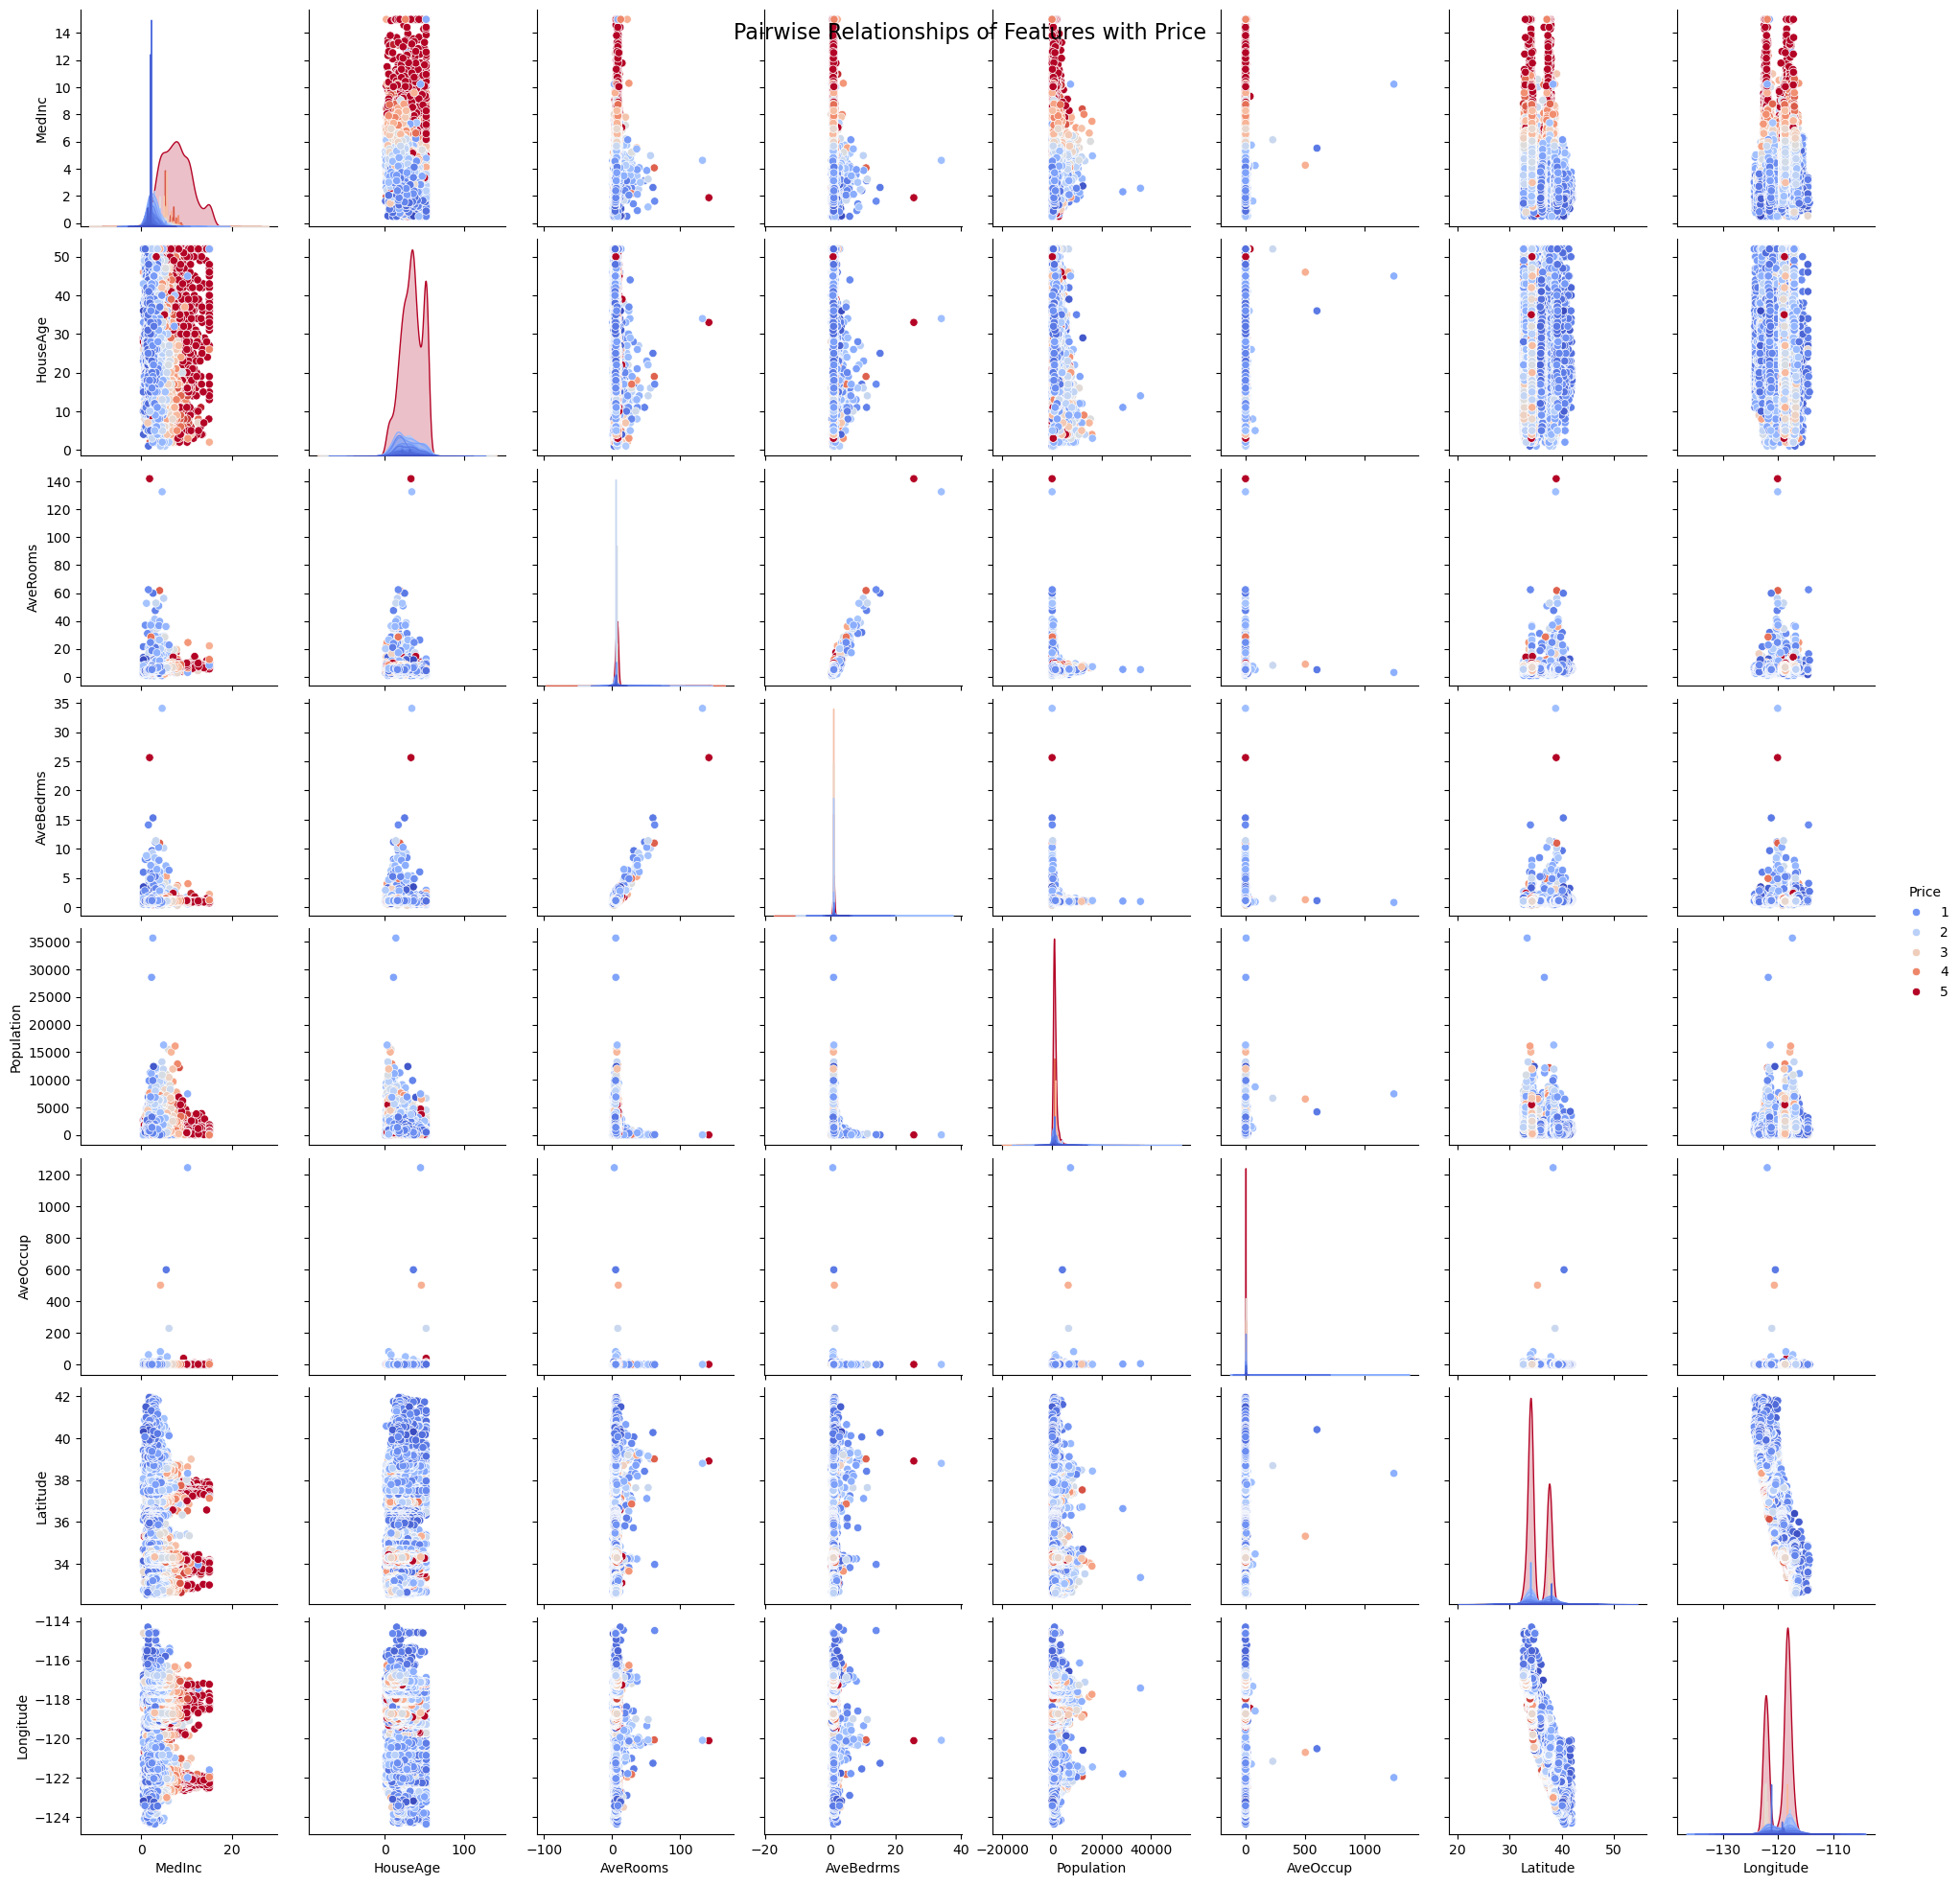

In [17]:
# Pairplot to see pairwise relationships
sns.pairplot(california_df, hue='Price', palette='coolwarm')
plt.suptitle("Pairwise Relationships of Features with Price", fontsize=16)
plt.show()

In [18]:
# Identify features that have high correlation with the target variable
correlation_with_target = correlation_matrix['Price'].sort_values(ascending=False)
print("\nFeatures with high correlation with the target (Price):")
print(correlation_with_target)


Features with high correlation with the target (Price):
Price         1.000000
MedInc        0.688075
AveRooms      0.151948
HouseAge      0.105623
AveOccup     -0.023737
Population   -0.024650
Longitude    -0.045967
AveBedrms    -0.046701
Latitude     -0.144160
Name: Price, dtype: float64


In [19]:
# Identify the most important feature for prediction based on correlation
top_feature = correlation_with_target.index[1]
print(f"\nThe feature most highly correlated with the target (Price) is: {top_feature}")


The feature most highly correlated with the target (Price) is: MedInc


PREPARING THE DATA

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [26]:
# Convert the data into a Pandas DataFrame for easier analysis
california_df = pd.DataFrame(california.data, columns=california.feature_names)

# Add the target as a new column (housing prices)
california_df['Price'] = california.target


In [28]:
# Correlation matrix (numerical)
correlation_matrix = california_df.corr()
print("\nCorrelation matrix (numerical):")
print(correlation_matrix)


Correlation matrix (numerical):
              MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc      1.000000 -0.119034  0.326895  -0.062040    0.004834  0.018766   
HouseAge   -0.119034  1.000000 -0.153277  -0.077747   -0.296244  0.013191   
AveRooms    0.326895 -0.153277  1.000000   0.847621   -0.072213 -0.004852   
AveBedrms  -0.062040 -0.077747  0.847621   1.000000   -0.066197 -0.006181   
Population  0.004834 -0.296244 -0.072213  -0.066197    1.000000  0.069863   
AveOccup    0.018766  0.013191 -0.004852  -0.006181    0.069863  1.000000   
Latitude   -0.079809  0.011173  0.106389   0.069721   -0.108785  0.002366   
Longitude  -0.015176 -0.108197 -0.027540   0.013344    0.099773  0.002476   
Price       0.688075  0.105623  0.151948  -0.046701   -0.024650 -0.023737   

            Latitude  Longitude     Price  
MedInc     -0.079809  -0.015176  0.688075  
HouseAge    0.011173  -0.108197  0.105623  
AveRooms    0.106389  -0.027540  0.151948  
AveBedrms   0.069721

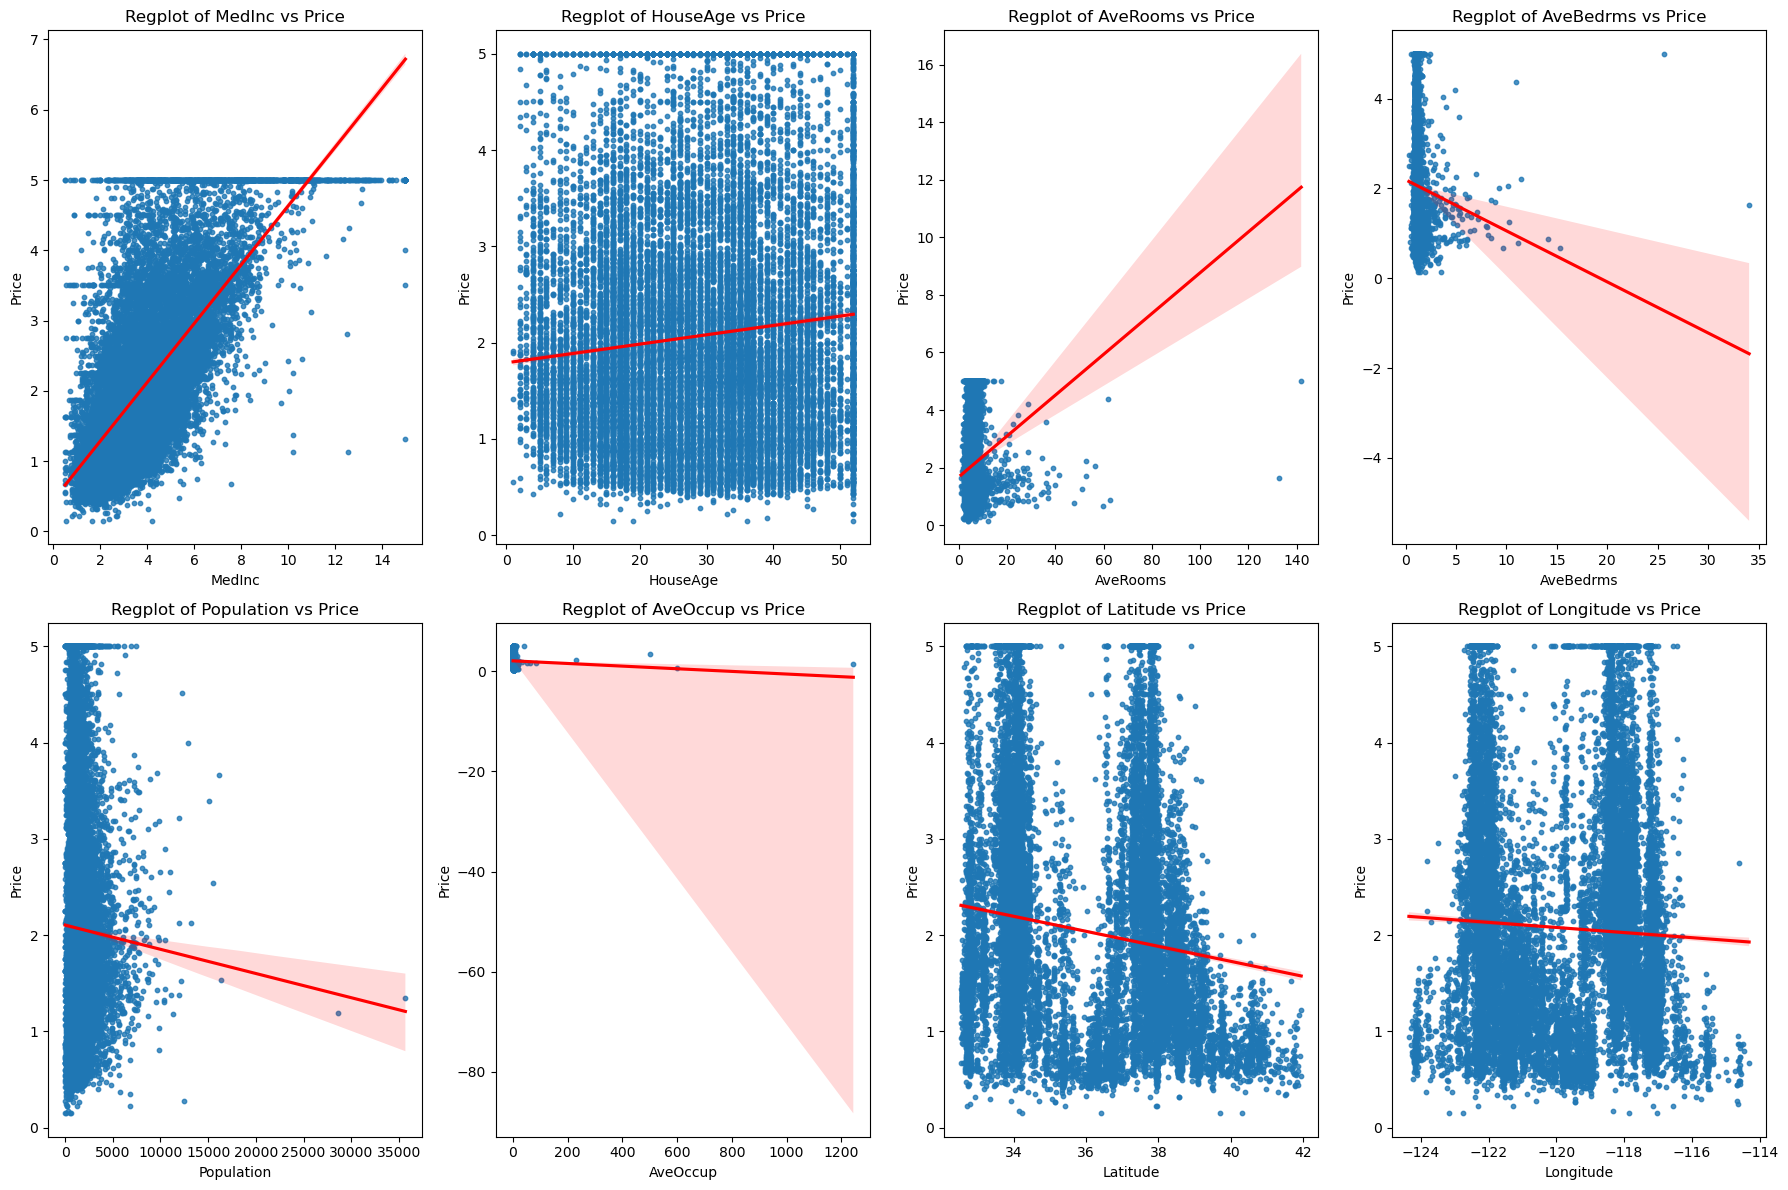

In [27]:
# Plotting regplots for each feature against Price to visually inspect relationships
plt.figure(figsize=(18, 12))

# Loop through each feature to create a regplot for visualization
for i, feature in enumerate(california_df.columns[:-1], 1):  # Exclude 'Price' from features
    plt.subplot(2, 4, i)  # Create 2 rows, 4 columns of plots
    sns.regplot(x=california_df[feature], y=california_df['Price'], scatter_kws={'s': 10}, line_kws={'color': 'red'})
    plt.title(f'Regplot of {feature} vs Price', fontsize=12)

plt.tight_layout()
plt.show()

Now based on insights from the regplots and correlation of EDA, we select the main features

In [341]:
# Decision based on regplots and corr
selected_features = ['MedInc', 'AveRooms', 'HouseAge', 'Latitude', 'Longitude']


In [374]:
# Feature engineering: Creating new features based on existing data
california_df['RoomsToBedroomsRatio'] = california_df['AveRooms'] / california_df['AveBedrms']
california_df['PopulationDensity'] = california_df['Population'] / (california_df['Latitude'].max() - california_df['Latitude'].min())  # Simplified
# Calculate the center of the region (mean of Latitude and Longitude)
mean_latitude = california_df['Latitude'].mean()
mean_longitude = california_df['Longitude'].mean()
min_latitude=california_df['Latitude'].min()

# Create a new feature representing the distance from the center (Euclidean distance)
california_df['DistanceFromCenter'] = np.sqrt(
    (california_df['Latitude'] - mean_latitude)**2 + (california_df['Longitude'] - mean_longitude)**2
)

In [375]:
# Display the first few rows of the updated dataset with selected and engineered features
print("\nUpdated dataset with selected features and engineered features:")
print(california_df[selected_features + ['RoomsToBedroomsRatio', 'PopulationDensity','DistanceFromCenter', 'Price']].head())

# Basic statistical summary of the selected and engineered features
print("\nBasic statistical summary of selected features and engineered features:")
print(california_df[selected_features + ['RoomsToBedroomsRatio', 'PopulationDensity','DistanceFromCenter', 'Price']].describe())


Updated dataset with selected features and engineered features:
   MedInc  AveRooms  HouseAge  Latitude  Longitude  RoomsToBedroomsRatio  \
0  8.3252  6.984127      41.0     37.88    -122.23              6.821705   
1  8.3014  6.238137      21.0     37.86    -122.22              6.418626   
2  7.2574  8.288136      52.0     37.85    -122.24              7.721053   
3  5.6431  5.817352      52.0     37.85    -122.25              5.421277   
4  3.8462  6.281853      52.0     37.85    -122.25              5.810714   

   PopulationDensity  DistanceFromCenter  RoomsToBedroomsRatio  \
0          34.218916            3.483001              6.821705   
1         255.154091            3.462466              6.418626   
2          52.709883            3.471400              7.721053   
3          59.298618            3.479098              5.421277   
4          60.042508            3.479098              5.810714   

   PopulationDensity  DistanceFromCenter  Price  
0          34.218916           

REMOVE OUTLIER 

In [376]:
# Remove outliers based on z-scores
from scipy.stats import zscore

In [377]:
# Define features for outlier detection
outlier_columns = ['MedInc', 'AveRooms', 'HouseAge', 'Latitude', 'Longitude', 'RoomsToBedroomsRatio', 'PopulationDensity','DistanceFromCenter']
z_scores = np.abs(zscore(california_df[outlier_columns]))

In [378]:
# Define threshold for identifying outliers
threshold = 5
non_outlier_indices = (z_scores < threshold).all(axis=1)

In [379]:
# Filter out rows with outliers
california_df_cleaned = california_df[non_outlier_indices]

print(f"Original dataset size: {california_df.shape}")
print(f"Cleaned dataset size: {california_df_cleaned.shape}")

Original dataset size: (20640, 12)
Cleaned dataset size: (20374, 12)


In [380]:
# Re-define selected features and target
selected_features = ['MedInc', 'AveRooms', 'HouseAge', 'Latitude', 'Longitude', 'RoomsToBedroomsRatio', 'PopulationDensity','DistanceFromCenter']
X = california_df_cleaned[selected_features]
y = california_df_cleaned['Price']

TEST-TRAIN SPLIT

In [381]:
# Train-Test Split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [382]:
# Standardization (feature scaling) - Fit on training data, then transform both train and test
scaler = StandardScaler()


In [383]:
# Fit the scaler on the training data and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the already fitted scaler
X_test_scaled = scaler.transform(X_test)


In [400]:
# Display the shapes of the split datasets
print("Shape of X_train_scaled:", X_train_scaled.shape)
print("Shape of X_test_scaled:", X_test_scaled.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train_scaled: (16299, 8)
Shape of X_test_scaled: (4075, 8)
Shape of y_train: (16299,)
Shape of y_test: (4075,)


MODEL TRAINING

In [401]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [402]:
# Initialize the Linear Regression model
model = LinearRegression()

In [403]:
# Train the model using the scaled training data
model.fit(X_train_scaled, y_train)


LinearRegression()

In [404]:
# Make predictions on the test data
y_pred = model.predict(X_test_scaled)


EVALUATING THE MODEL PERFORMANCE

In [405]:
# Metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100


In [406]:
# Display the metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)
print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Absolute Error (MAE): 0.5249877408700959
Mean Squared Error (MSE): 0.505051359038253
Root Mean Squared Error (RMSE): 0.7106696553520863
R² Score: 0.6291212436182851
Mean Absolute Percentage Error (MAPE): 31.527085136400274


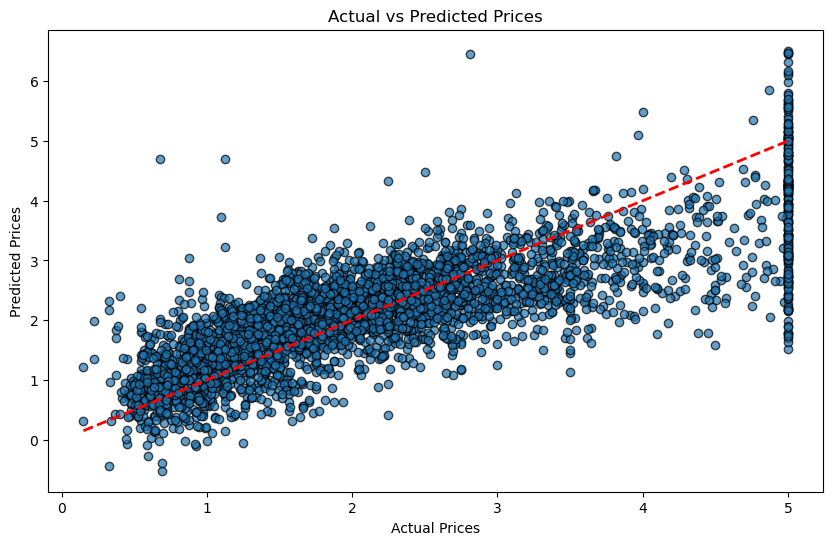

In [407]:
# Visualization: Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

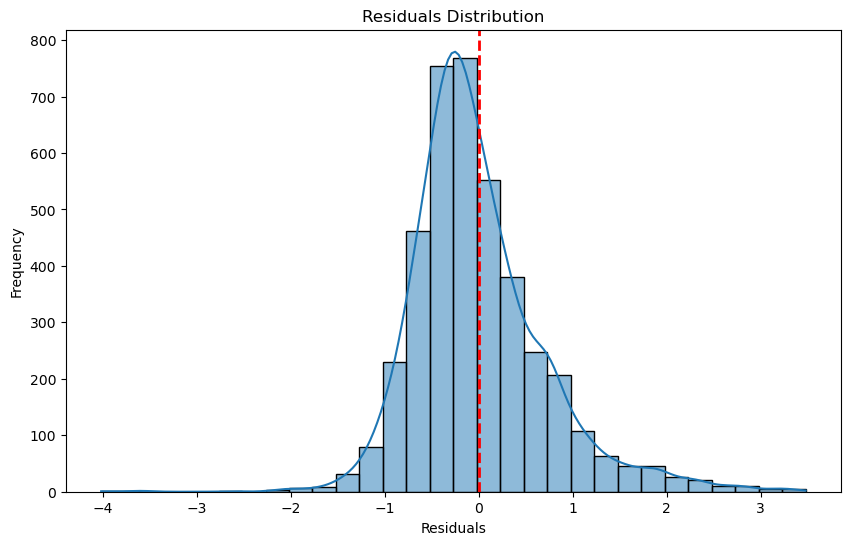

In [408]:
# Visualization: Residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.axvline(0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

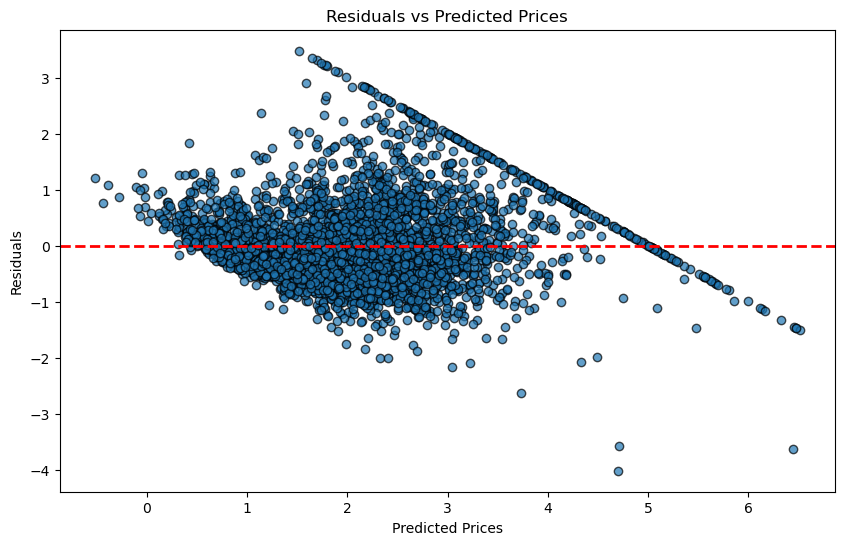

In [409]:
# Visualization: Residuals vs. Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.7, edgecolor='k')
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Prices')
plt.show()

NEW DATA PREDICTION

In [410]:

# Step 1: Ask for user input for the required features
def ask_for_input():
    print("Please enter the following details for the house:")

    # List of all input features (raw features)
    input_features = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

    # Initialize a dictionary to store input values
    inputs = {}

    # Ask for each raw feature in the dataset
    for feature in input_features:
        while True:
            try:
                value = float(input(f"Enter {feature.replace('_', ' ')}: "))
                inputs[feature] = value
                break
            except ValueError:
                print("Please enter a valid number.")

    # Step 2: Calculate the engineered features based on raw inputs
    # Rooms to Bedrooms ratio
    rooms_to_bedrooms = inputs['AveRooms'] / inputs['AveBedrms'] if inputs['AveBedrms'] != 0 else 0
    # Population density
    population_density = inputs['Population'] / (inputs['Latitude'] - min_latitude)  # Simplified
    # Distance from the center (mean of Latitude and Longitude)
    distance_from_center = np.sqrt((inputs['Latitude'] - mean_latitude)**2 + (inputs['Longitude'] - mean_longitude)**2)
    
    # Step 3: Add the engineered features to the input dictionary
    inputs['RoomsToBedroomsRatio'] = rooms_to_bedrooms
    inputs['PopulationDensity'] = population_density
    inputs['DistanceFromCenter'] = distance_from_center

    # Step 4: Extract the selected features and engineered features for scaling
    selected_features = ['MedInc', 'AveRooms', 'HouseAge', 'Latitude', 'Longitude']
    final_features = selected_features + ['RoomsToBedroomsRatio', 'PopulationDensity', 'DistanceFromCenter']

    # Prepare the data to be passed to the scaler
    data_for_scaling = np.array([list(inputs[feature] for feature in final_features)])

    # Return both the data to be scaled and the complete input data for reference
    return data_for_scaling, inputs

# Step 5: Get user input and process the data
data_for_scaling, inputs = ask_for_input()

# Step 6: Scale the data using the pre-fitted scaler
scaled_data = scaler.transform(data_for_scaling)  # Scale all the required features

# Step 7: Make a prediction using the model
predicted_price = model.predict(scaled_data)  # Predict price

# Step 8: Output the prediction
print(f"\nPredicted house price: ${predicted_price[0] * 100000:.2f}")


Please enter the following details for the house:


Enter MedInc:  8.30140000e+00
Enter HouseAge:  2.10000000e+01
Enter AveRooms:  6.23813708e+00
Enter AveBedrms:  9.71880492e-01
Enter Population:  2.40100000e+03
Enter AveOccup:  2.10984183e+00
Enter Latitude:  3.78600000e+01
Enter Longitude:  -1.22220000e+02



Predicted house price: $410404.77


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [396]:
california.data[1].reshape(1,-1)

array([[ 8.30140000e+00,  2.10000000e+01,  6.23813708e+00,
         9.71880492e-01,  2.40100000e+03,  2.10984183e+00,
         3.78600000e+01, -1.22220000e+02]])

Pickling The Model file For Deployment

In [411]:
import pickle

# Save the trained model and scaler to disk
with open('model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

print("Model and scaler saved successfully!")


Model and scaler saved successfully!


In [412]:
import pickle

# Load the saved model and scaler from disk
with open('model.pkl', 'rb') as model_file:
    model = pickle.load(model_file)

with open('scaler.pkl', 'rb') as scaler_file:
    scaler = pickle.load(scaler_file)

print("Model and scaler loaded successfully!")

# Now you can use the model and scaler for predictions
# Define your function for user input, feature engineering, and prediction

def ask_for_input():
    print("Please enter the following details for the house:")

    # List of all input features (raw features)
    input_features = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

    # Initialize a dictionary to store input values
    inputs = {}

    # Ask for each raw feature in the dataset
    for feature in input_features:
        while True:
            try:
                value = float(input(f"Enter {feature.replace('_', ' ')}: "))
                inputs[feature] = value
                break
            except ValueError:
                print("Please enter a valid number.")

    # Step 2: Calculate the engineered features based on raw inputs
    # Rooms to Bedrooms ratio
    rooms_to_bedrooms = inputs['AveRooms'] / inputs['AveBedrms'] if inputs['AveBedrms'] != 0 else 0
    # Population density
    population_density = inputs['Population'] / (inputs['Latitude'] - min_latitude)  # Simplified
    # Distance from the center (mean of Latitude and Longitude)
    distance_from_center = np.sqrt((inputs['Latitude'] - mean_latitude)**2 + (inputs['Longitude'] - mean_longitude)**2)
    
    # Step 3: Add the engineered features to the input dictionary
    inputs['RoomsToBedroomsRatio'] = rooms_to_bedrooms
    inputs['PopulationDensity'] = population_density
    inputs['DistanceFromCenter'] = distance_from_center

    # Step 4: Extract the selected features and engineered features for scaling
    selected_features = ['MedInc', 'AveRooms', 'HouseAge', 'Latitude', 'Longitude']
    final_features = selected_features + ['RoomsToBedroomsRatio', 'PopulationDensity', 'DistanceFromCenter']

    # Prepare the data to be passed to the scaler
    data_for_scaling = np.array([list(inputs[feature] for feature in final_features)])

    # Return both the data to be scaled and the complete input data for reference
    return data_for_scaling, inputs



# Get user input and process the data
data_for_scaling, inputs = ask_for_input()

# Scale the data using the pre-fitted scaler
scaled_data = scaler.transform(data_for_scaling)  # Scale all the required features

# Make a prediction using the model
predicted_price = model.predict(scaled_data)  # Predict price

# Output the prediction
print(f"\nPredicted house price: ${predicted_price[0] * 100000:.2f}")


Model and scaler loaded successfully!
Please enter the following details for the house:


Enter MedInc:   8.30140000e+00
Enter HouseAge:  2.10000000e+01
Enter AveRooms:  6.23813708e+00
Enter AveBedrms:  9.71880492e-01
Enter Population:  2.40100000e+03
Enter AveOccup:   2.10984183e+00
Enter Latitude:  3.78600000e+01
Enter Longitude:  -1.22220000e+02



Predicted house price: $410404.77


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
